In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)
# * Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Import the dataset 

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE/EDA/LAB/TAKE_HOME/DAY 3/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.3 Check the shape of the dataset

In [ ]:
df.shape

(303, 14)

### 1.4 How to view the statistical characteristics of the data?

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see the summary statistics of  Age column?

In [ ]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### 1.6 How to check the column names

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.7 Find the Numerical ,Categorical Features and  Alphanumeric Features in the dataset?

#### Change the column names

In [ ]:
df_num=df_num=df[['age','trestbps','chol','thalach','oldpeak','ca','cp']]
df_num

,age,trestbps,chol,thalach,oldpeak,ca,cp
0,63,145,233,150,2.3,0,3
1,37,130,250,187,3.5,0,2
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,0
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0
299,45,110,264,132,1.2,0,3
300,68,144,193,141,3.4,2,0
301,57,130,131,115,1.2,1,0


In [ ]:
df_obj=df[['sex','fbs','exang','slope','thal','target','restecg']].astype('object')
df_obj

,sex,fbs,exang,slope,thal,target,restecg
0,1,1,0,0,1,1,0
1,1,0,0,0,2,1,1
2,0,0,0,2,2,1,0
3,1,0,0,2,2,1,1
4,0,0,1,2,2,1,1
...,...,...,...,...,...,...,...
298,0,0,1,1,3,0,1
299,1,0,0,1,3,0,1
300,1,1,0,1,3,0,1
301,1,0,1,1,3,0,1


In [ ]:
df1=pd.concat([df_num,df_obj],axis=1)
df1

,age,trestbps,chol,thalach,oldpeak,ca,cp,sex,fbs,exang,slope,thal,target,restecg
0,63,145,233,150,2.3,0,3,1,1,0,0,1,1,0
1,37,130,250,187,3.5,0,2,1,0,0,0,2,1,1
2,41,130,204,172,1.4,0,1,0,0,0,2,2,1,0
3,56,120,236,178,0.8,0,1,1,0,0,2,2,1,1
4,57,120,354,163,0.6,0,0,0,0,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,1,1,3,0,1
299,45,110,264,132,1.2,0,3,1,0,0,1,3,0,1
300,68,144,193,141,3.4,2,0,1,1,0,1,3,0,1
301,57,130,131,115,1.2,1,0,1,0,1,1,3,0,1


## 1.8 Categorical vs. Quantitative

### 1.8a) Create a bar plot between  Gender and target. And write  your Observation:

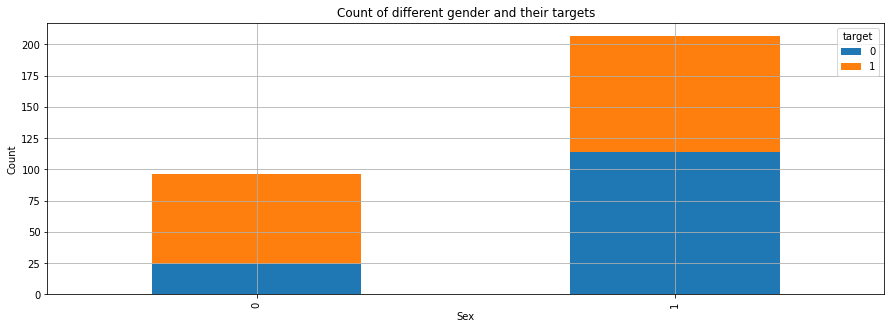

In [ ]:

t=pd.crosstab(index=df1['sex'],columns=df1['target'])
t.plot(kind='bar',stacked=True,figsize=(15,5),grid=True)
plt.ylabel("Count")
plt.xlabel("Sex")
plt.title("Count of different gender and their targets")
plt.show()

### 1.8b) Create  a Bar plot between target vs Sex  And write your Observations?

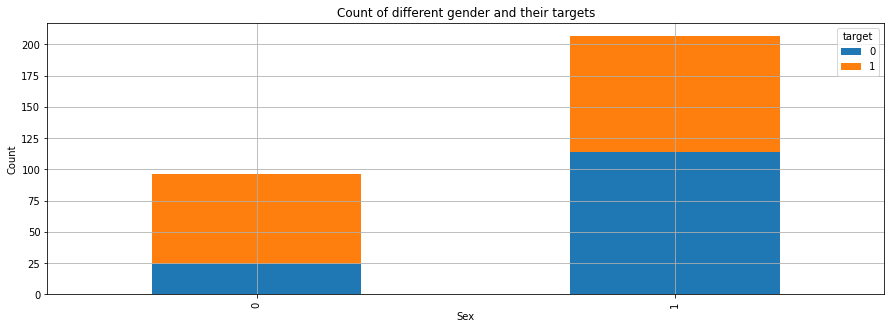

In [ ]:
t=pd.crosstab(index=df1['sex'],columns=df1['target'])
t.plot(kind='bar',stacked=True,figsize=(15,5),grid=True)
plt.ylabel("Count")
plt.xlabel("Sex")
plt.title("Count of different gender and their targets")
plt.show()

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type as well as chest_pain_type: Heart Disease or Not. And write  your Observations?

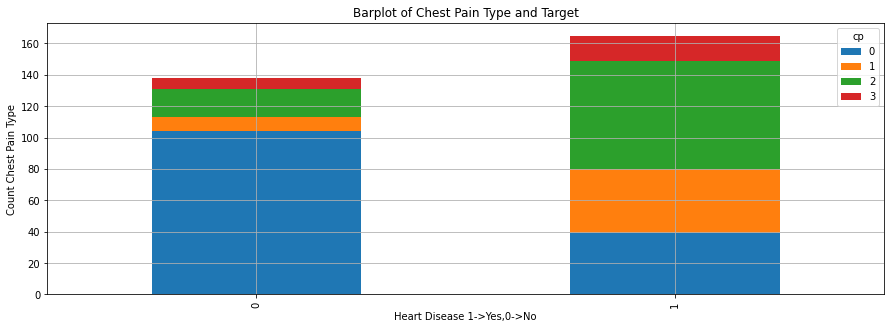

In [ ]:
pd.crosstab(index=df1['target'],columns=df1['cp']).plot(kind='bar',stacked=True,grid=True,figsize=(15,5))
plt.title("Barplot of Chest Pain Type and Target")
plt.ylabel("Count Chest Pain Type")
plt.xlabel("Heart Disease 1->Yes,0->No")
plt.show()

### 1.8c) Create violinplot plot for  fasting_blood_sugar and Age vs target'. And write your Observations?

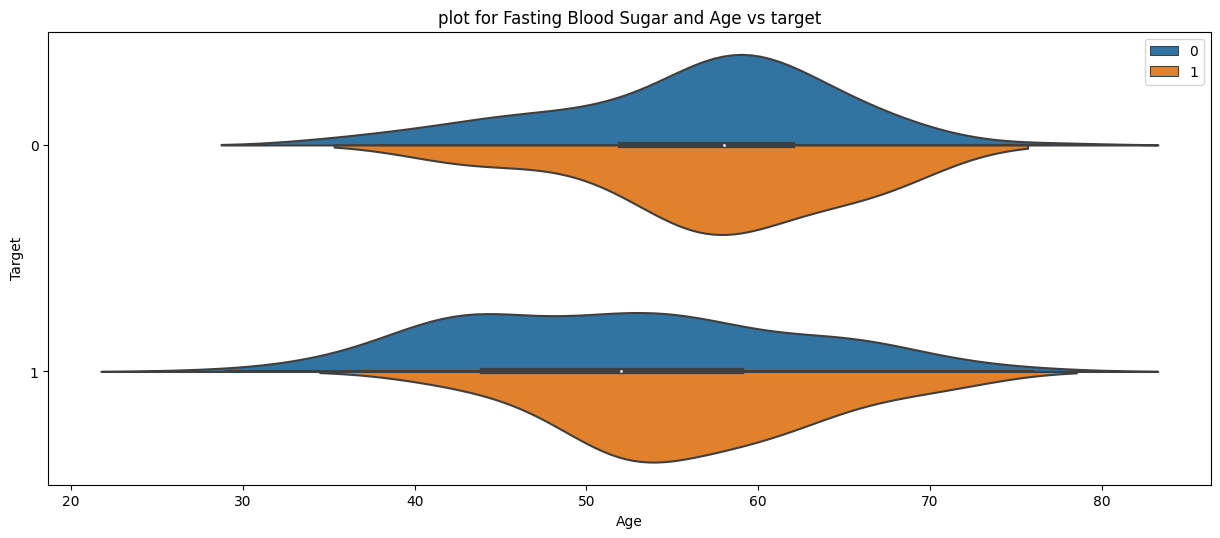

In [ ]:
plt.figure(figsize=(15,6),dpi=100)
sns.violinplot(data=df1,x='age',hue='fbs',y='target',split=True,orient='h')
plt.title("plot for Fasting Blood Sugar and Age vs target")
plt.xlabel("Age")
plt.ylabel("Target")
plt.legend()
plt.show()

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And write your Observations?

No handles with labels found to put in legend.


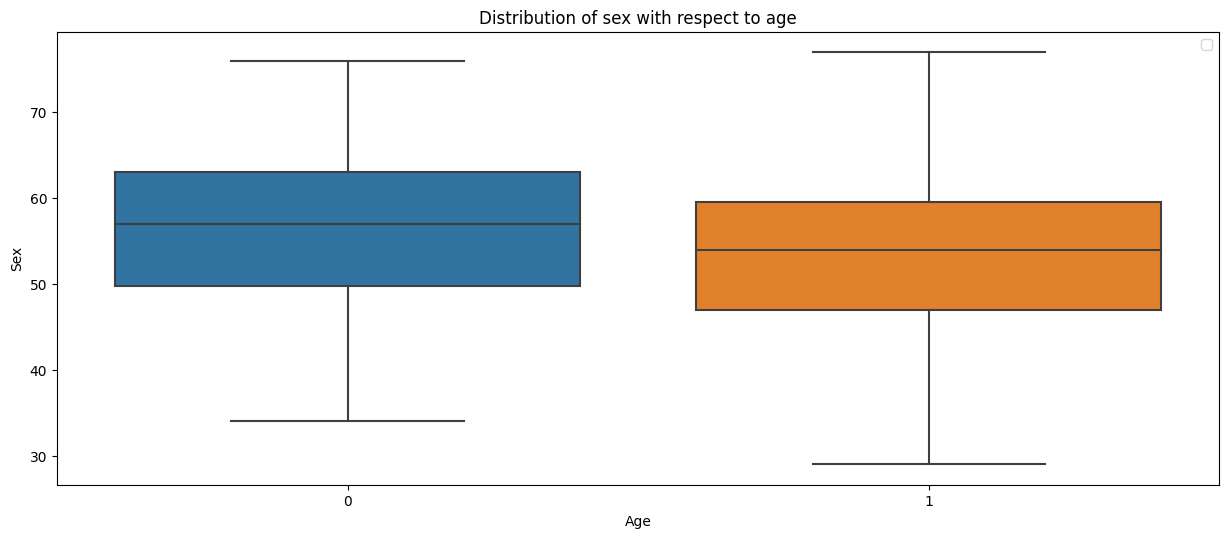

In [ ]:
plt.figure(figsize=(15,6),dpi=100)
sns.boxplot(data=df1,y=df1['age'],x=df1['sex'])
plt.title("Distribution of sex with respect to age")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.legend()
plt.show()

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

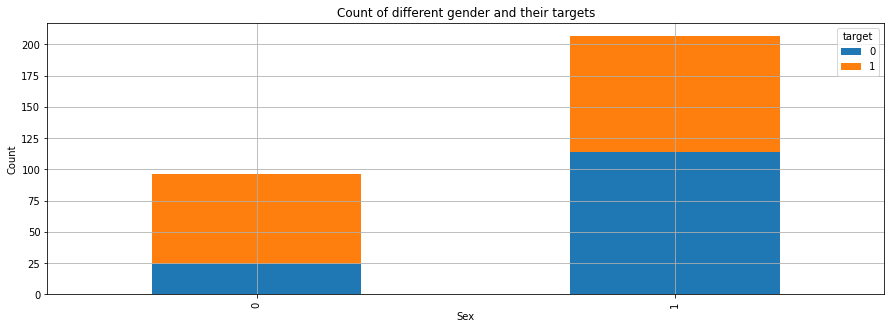

In [ ]:
t=pd.crosstab(index=df1['sex'],columns=df1['target'])
t.plot(kind='bar',stacked=True,figsize=(15,5),grid=True)
plt.ylabel("Count")
plt.xlabel("Sex")
plt.title("Count of different gender and their targets")
plt.show()

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for target & Sex. And write your Observations?

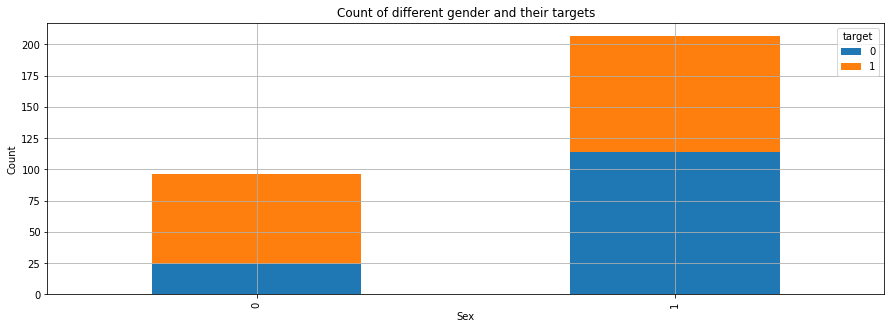

In [ ]:
t=pd.crosstab(index=df1['sex'],columns=df1['target'])
t.plot(kind='bar',stacked=True,figsize=(15,5),grid=True)
plt.ylabel("Count")
plt.xlabel("Sex")
plt.title("Count of different gender and their targets")
plt.show()

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for age & st_depression. And write your Observations?¶

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


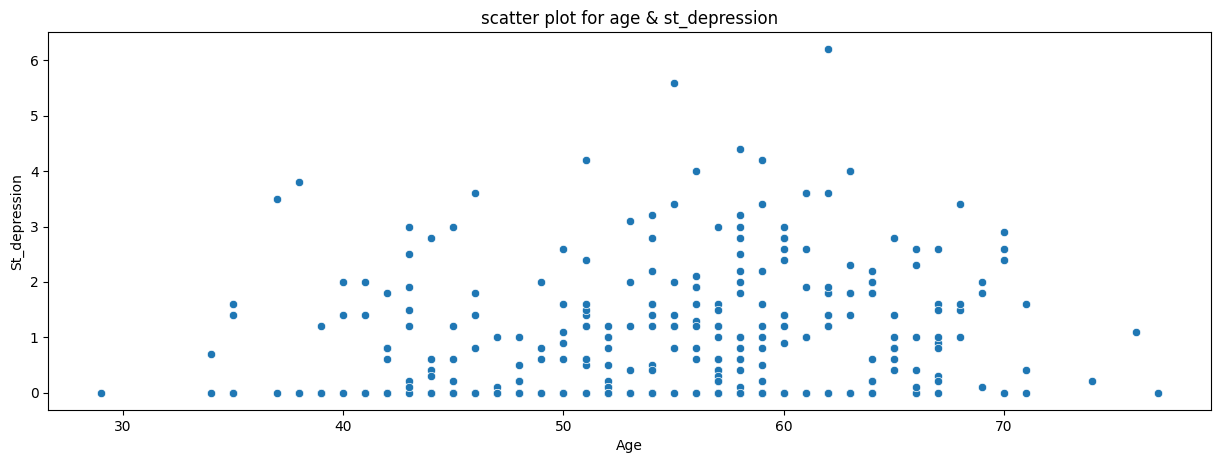

In [ ]:
plt.figure(figsize=(15,5),dpi=100)
sns.scatterplot(df1['age'],df1['oldpeak'])
plt.title("scatter plot for age & st_depression")
plt.xlabel("Age")
plt.ylabel("St_depression")
plt.show()

# THE END